# 00. はじめに
本内容は、8*8pxの手書きの数字データから実際の数字に分類するScikit-learnの実験用データを用いた、機械学習のハンズオン資料です。

理解しやすいように、最初から全てを混ぜた説明をせずに、１つ１つの処理を分けて説明しています。
以上の理由から、実践的な作業の流れになっていませんので、その点御理解下さい。

# 01. 準備

## ライブラリのインポート
機械学習の実装を行うに当たって、役に立つライブラリにをインポート。

ライブラリの説明は下記の通り。

### Pandas
- 概要  
データ解析を支援する機能を提供するライブラリ。数表や時系列データを操作するためのデータ構造と演算を提供。

- 特徴
 - データ操作のための高速で効率的なDataFrame (行列型) オブジェクト
 - メモリ内のデータ構造と複数のフォーマット(CSV, TXT, xls, xlsx, )のデータ間で相互に読み書きするためのツール群
 - データ処理(カウント, 集計, 変換, 欠損値処理, マージ, 結合, etc...)
 - 時系列データ処理(日, 週, 月, 四半期, 年)

### Matplotlib(mpl_toolkits含む)
- 概要  
グラフ描画の為のライブラリ。

- グラフの種類
 - 折れ線グラフ
 - 散布図
 - ヒストグラム
 - ヒートマップ
 - 3Dグラフ

### Numpy
- 概要  
プログラミング言語Pythonにおいて数値計算を効率的に行うためのライブラリ。

効率的な数値計算を行うための型付きの多次元配列（例えばベクトルや行列など）のサポートをPythonに加えるとともに、それらを操作するための大規模な高水準の数学関数ライブラリを提供。

### scikit-learn
- 概要  
Pythonのオープンソース機械学習ライブラリ。
Pythonの数値計算ライブラリのNumPyとSciPyとやり取りするよう設計されている。

In [0]:
# No.1
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pld
from sklearn.linear_model import SGDClassifier

# Jupyter Notebookの中でグラフ等をインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline

## データの読込・確認
scikit-learn付属の実験用データを読み込み。

実験用データはグレイスケールの8*8pxの特徴と、それに対応した実際の数字が何かを記載した情報。

In [0]:
# No.2
# データの読込
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# No.3
# データの確認
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


データの確認
- data: 説明変数(特徴)
- target: 目的変数
- target_names: 特徴名
- images: dataを8*8pxの画像を表す形に加工したもの
- DESCR: データの概要

In [4]:
# No.4
# digits.dataのデータ量(行列)の把握
print(f'dataの行列数:\n{digits.data.shape}')

print('-------------------------------')

# digits.dataデータの確認
print(f'全てのdata:\n{digits.data}')

print('-------------------------------')

print(f'dataの中の1件目のデータ:\n{digits.data[0]}')

dataの行列数:
(1797, 64)
-------------------------------
全てのdata:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
-------------------------------
dataの中の1件目のデータ:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
# No.5
# digits.targetのデータ量(行列)の把握
print(f'targetの行列数:\n{digits.target.shape}')

print('-------------------------------')

# digits.targetデータの確認
print(f'全てのtarget:\n{digits.target}')

print('-------------------------------')

print(f'targetの中の1件目のデータ:\n{digits.target[0]}')

targetの行列数:
(1797,)
-------------------------------
全てのtarget:
[0 1 2 ... 8 9 8]
-------------------------------
targetの中の1件目のデータ:
0


## digits.data(説明変数)とdigits.target(目的変数)の整理

digits.data(説明変数)は8*8pxの手書き数字の画像情報で1px毎に色を数字で表したデータがセットされている。

digits.target(目的変数)はdigits.data(説明変数)が何の数字かをセットした情報

|digits.data(説明変数)|digits.target(目的変数)|
|--|--|
|[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3. 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]|0|
|[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16. 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]|1|

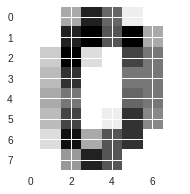

In [6]:
# No.6
# digits.data[0]を画像データに変換して確認
def show_image(data):
  
    # matplotlibの表示サイズの設定
    plt.figure(figsize=(3, 3))
    
    # 画像用のサイズ取得
    size = int(np.sqrt(len(data)))
    
    # 配列データを、matplotlibの図にレンダリング
    plt.imshow(np.reshape(data, (size, size)), cmap=plt.cm.gray_r, interpolation='nearest')
    
    # レンダリング結果を表示
    plt.show()

show_image(digits.data[0])

In [7]:
# No.7
# digits.images(digits.dataを画像と同じ行列に加工したデータ)
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


**Note!**

データはあくまで数値データが本体。画像データを直接扱っているわけではないので要注意。

本来は画像データを、プログラムなどで数値データに変換しないと機会学習の殆どの技術は扱えなかったが、ディープラーニングによって画像を直接扱う事が可能になった。



In [0]:
# No.8
# 説明変数データをセット
X = digits.data

# 目的変数データをセット
y = digits.target

In [9]:
# No.9
# アルゴリズムに確率的勾配降下法(Stocastic Gradient Descent)を採用
# max_iter: エポック数(一つの訓練データで学習を何回繰り返すかの数の事)
clf = SGDClassifier(max_iter=200)


# fit関数でモデル作成
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=200,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

エポック数について詳しく知りたい場合は[コチラを参照](http://st-hakky.hatenablog.com/entry/2017/01/17/165137)

In [10]:
# No.10
# 評価(正答率)
from sklearn import metrics

y_pred = clf.predict(X)
score = metrics.accuracy_score(y, y_pred)
print(score)

0.9838619922092376


In [14]:
# No.11
# 予測結果が学習データの目的変数と一致しているかをチェックする為の関数
def is_pred_equals_traindata(y_pred, y):
  if y_pred == y:
    return True
  else:
    return False

# 誤答件数
wrong_answer_count = 0

# y_predの行数を繰り返し回数とする
number_of_iterations = int(y_pred.shape[0])

# 全行の答え合わせ
for i in range(number_of_iterations):
  
  result = is_pred_equals_traindata(y_pred[i], y[i])
  
  print(f'y_pred = {float(y_pred[i])}, y = {float(y[i])}, 結果 = {result}')
  
  if not result:
    wrong_answer_count += 1

y_pred = 0.0, y = 0.0, 結果 = True
y_pred = 1.0, y = 1.0, 結果 = True
y_pred = 2.0, y = 2.0, 結果 = True
y_pred = 3.0, y = 3.0, 結果 = True
y_pred = 4.0, y = 4.0, 結果 = True
y_pred = 5.0, y = 5.0, 結果 = True
y_pred = 6.0, y = 6.0, 結果 = True
y_pred = 7.0, y = 7.0, 結果 = True
y_pred = 8.0, y = 8.0, 結果 = True
y_pred = 9.0, y = 9.0, 結果 = True
y_pred = 0.0, y = 0.0, 結果 = True
y_pred = 1.0, y = 1.0, 結果 = True
y_pred = 2.0, y = 2.0, 結果 = True
y_pred = 3.0, y = 3.0, 結果 = True
y_pred = 4.0, y = 4.0, 結果 = True
y_pred = 5.0, y = 5.0, 結果 = True
y_pred = 6.0, y = 6.0, 結果 = True
y_pred = 7.0, y = 7.0, 結果 = True
y_pred = 8.0, y = 8.0, 結果 = True
y_pred = 9.0, y = 9.0, 結果 = True
y_pred = 0.0, y = 0.0, 結果 = True
y_pred = 1.0, y = 1.0, 結果 = True
y_pred = 2.0, y = 2.0, 結果 = True
y_pred = 3.0, y = 3.0, 結果 = True
y_pred = 4.0, y = 4.0, 結果 = True
y_pred = 5.0, y = 5.0, 結果 = True
y_pred = 6.0, y = 6.0, 結果 = True
y_pred = 7.0, y = 7.0, 結果 = True
y_pred = 8.0, y = 8.0, 結果 = True
y_pred = 9.0, y = 9.0, 結果 = True
y_pred = 0

In [15]:
# No.12
# 結果確認
print(f'誤答件数 = {wrong_answer_count}')
print(f'正答率 = {(y_pred.shape[0] - wrong_answer_count) / y_pred.shape[0]}')

# ref.
# データ件数 = y_pred.shape[0] = 1797件

誤答件数 = 29
正答率 = 0.9838619922092376
